# Supermart Grocery Sales - Retail Analytics Dataset

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [109]:

df = pd.read_csv(r"C:\Users\sriva\OneDrive\Desktop\Internship\Supermart Grocery Sales - Retail Analytics Dataset.csv")

df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [110]:

print(df.isnull().sum())

df.dropna(inplace=True)


df.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


### Exploratory Data Anlaysis

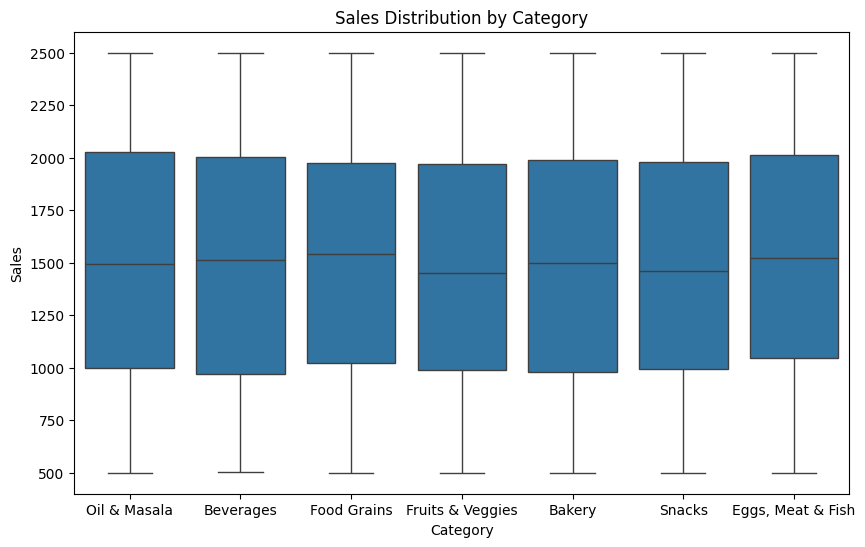

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')

plt.show()

The box plot all categories have very similar sales distributions, with no single category clearly being the most preferred based on this visual representation.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


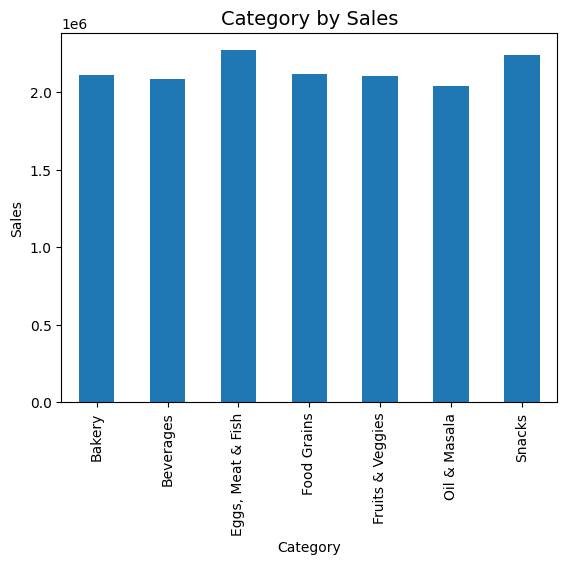

In [113]:

Sales_category=df.groupby("Category")["Sales"].sum()
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

According to this, Eggs, Meat and Fish have recorded highest sales among all the given different categories

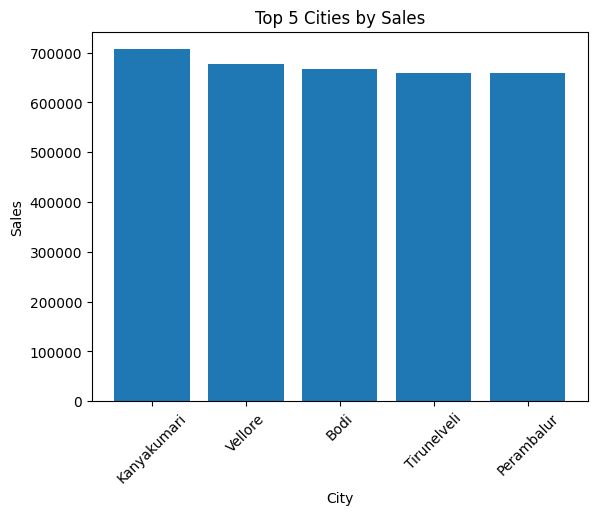

In [114]:

city_sales = df[['City', 'Sales']]
total_sales = city_sales.groupby('City').sum()
sorted_cities = total_sales.sort_values(by='Sales', ascending=False)
top_cities = sorted_cities.head(5)
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')

plt.xticks(rotation=45)
plt.show()

The result shows that Kanyakumari witnessed highest sales among top 5 cities.

In [115]:
df['Order Date']  = df['Order Date'].astype('datetime64[ns]')

In [116]:



# Extract day, month, and year from 'Order Date'
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(7)
memory u

In [118]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,8,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,8,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,12,6,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,11,10,2016


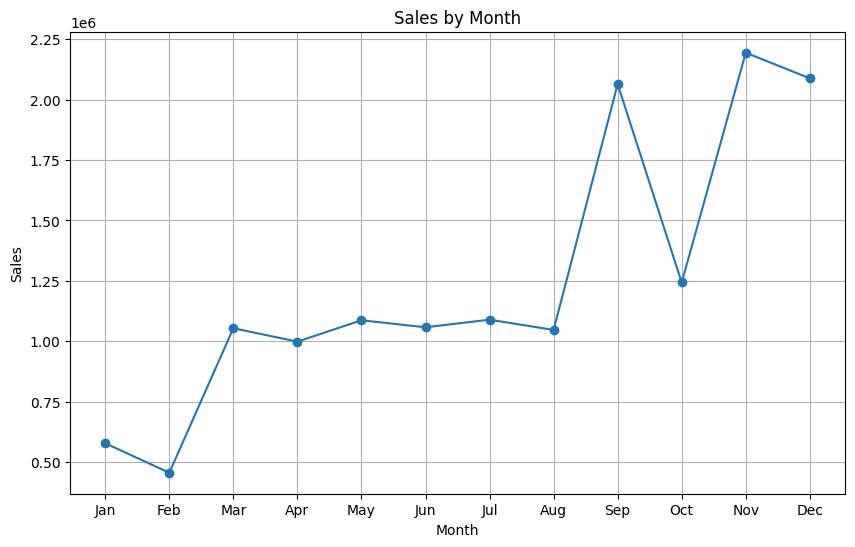

In [119]:

monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales_sorted = monthly_sales.sort_values(by='Order Month')
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Order Month'], monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Order Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

This suggests that sales are higher in last 4 months of the year with December registering highest sales probably due to festival season in these months 

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(7)
memory u

In [121]:
df['Order Year'] = df['Order Year'].astype('int')


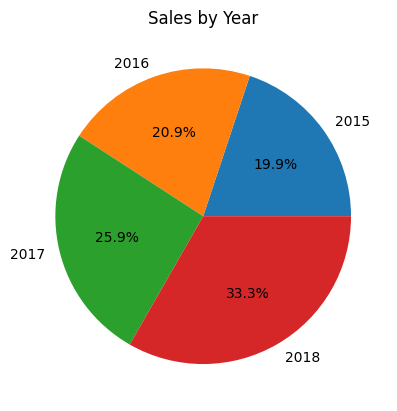

In [122]:
Yearly_Sales=df.groupby("Order Year")["Sales"].sum()
plt.pie(Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()

In [123]:
df['Sub Category'].nunique()

23

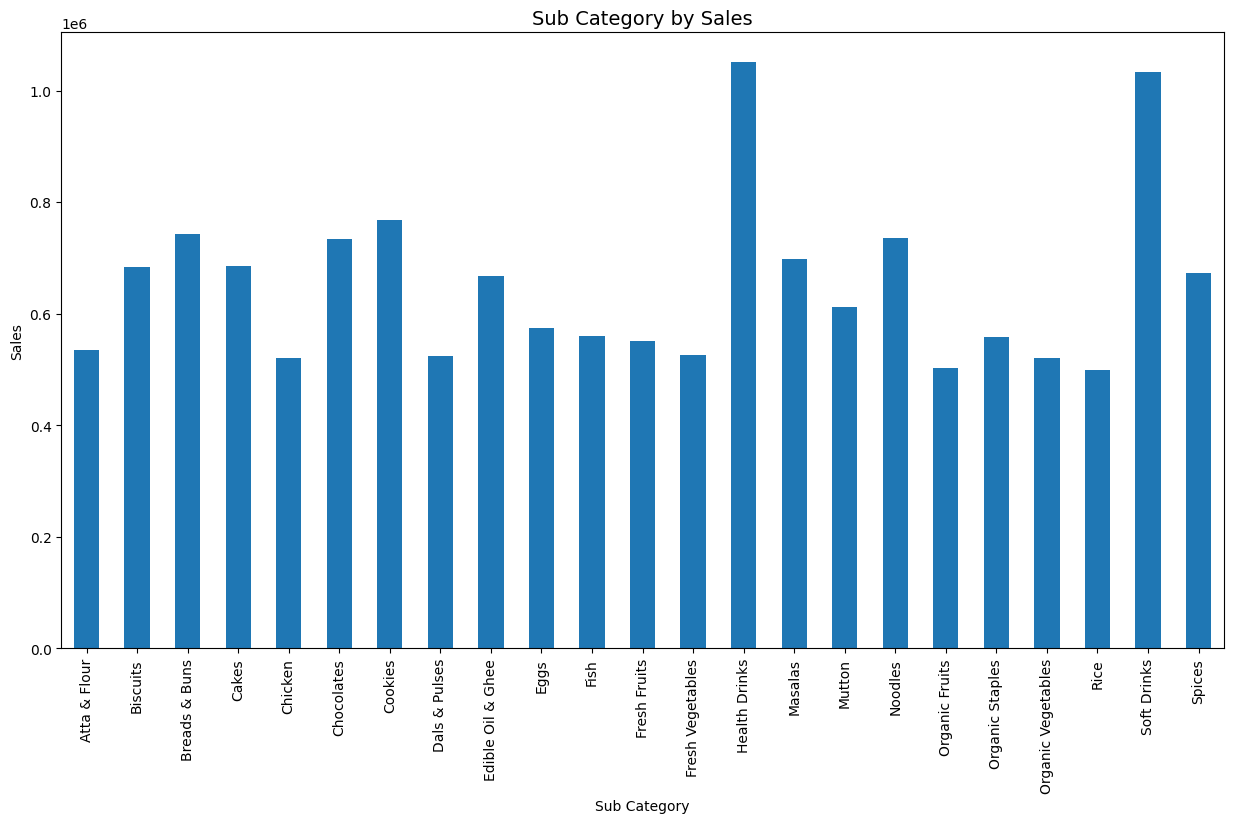

In [124]:
Sales_category=df.groupby("Sub Category")["Sales"].sum()
Sales_category.plot(kind='bar', figsize=(15,8))
plt.title('Sub Category by Sales', fontsize = 14)
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.show()

This suggests that Health drinks and Soft drinks were most sold items.

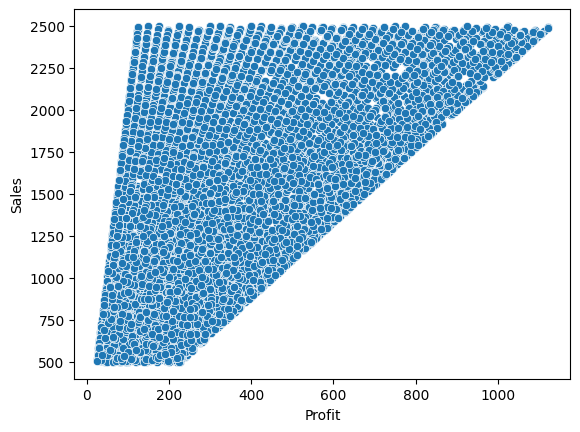

In [125]:
sns.scatterplot(x='Profit', y='Sales', data = df)
plt.show()

The scatter plot shows a positive correlation between Sales and Profit. As Sales increase, Profit also increases, indicating a direct relationship between the two variables

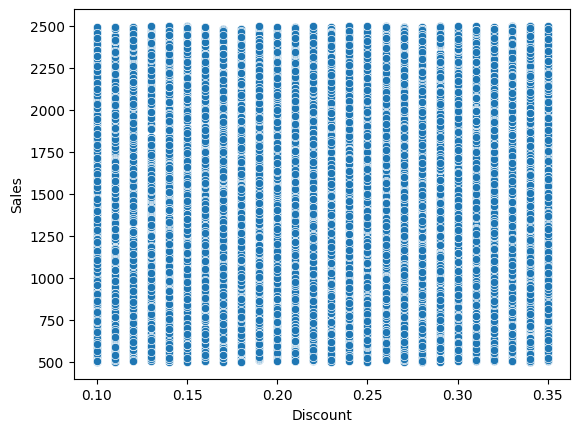

In [126]:
sns.scatterplot(x='Discount', y='Sales', data = df)
plt.show()

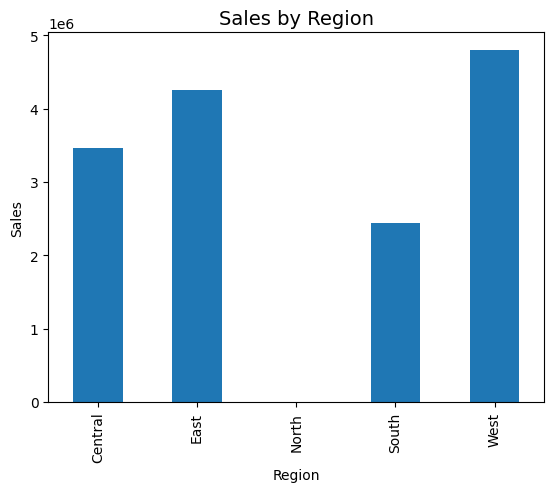

In [127]:
Region_sales=df.groupby("Region")["Sales"].sum()
Region_sales.plot(kind='bar')
plt.title('Sales by Region', fontsize = 14)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

This bar graph suggests that no sales were recorded in Northern region while maximum sales was recorded in western region

### Feature Engineering

In [128]:

le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Sub Category'] = le.fit_transform(df['Sub Category'])
df['City'] = le.fit_transform(df['City'])
df['Region'] = le.fit_transform(df['Region'])
df['State'] = le.fit_transform(df['State'])


df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8,11,2017
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8,11,2017
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12,6,2017
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11,10,2016
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11,10,2016


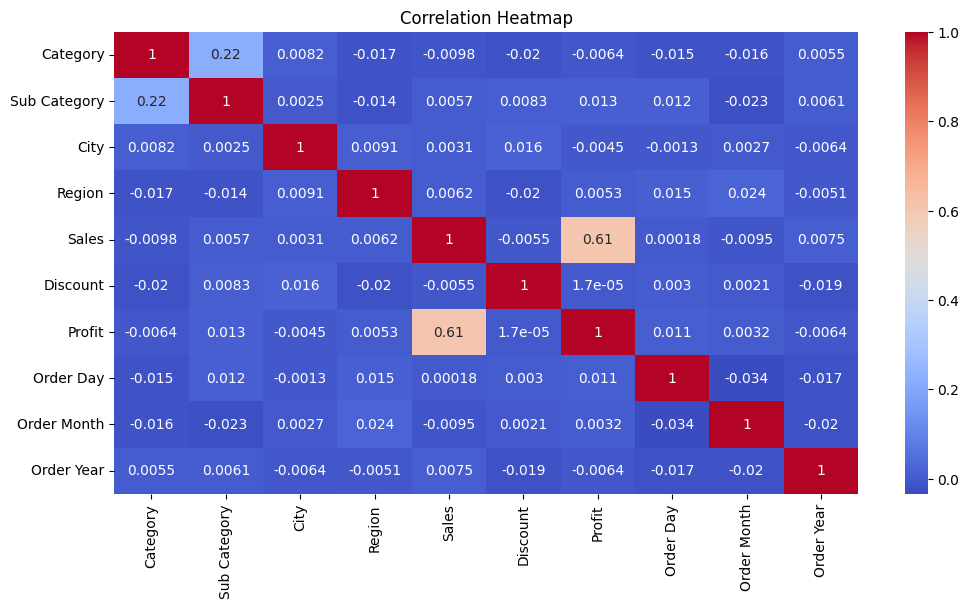

In [129]:
df1 = df.drop(columns=['Order ID', 'Customer Name', 'State', 'Order Date'])
plt.figure(figsize=(12, 6))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Since feature Profit has highest correlation with Sales, therefore first of all we will apply Simple linear regression model to evaluate our results

### Simple Linear Regression

In [130]:
x = df[['Profit']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_train,y_train)
yhat1 = lr.predict(x_test)

mse = mean_squared_error(y_test, yhat1)
r2 = r2_score(y_test, yhat1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212467.7321979487
R-squared: 0.35580038138845804


In [131]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x_test, y_test, cv=3)
np.mean(scores)

np.float64(0.35514994578162806)

Since R squared score is very less, we will apply Multiple Linear Regresssion to check if R squared value increases

### Multiple Linear Regression 

In [132]:
x = df.drop(columns=['Order Day', 'Sales', 'Order ID', 'Customer Name', 'State', 'Order Date' ])
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

mlr = LinearRegression()
mlr.fit(x_train, y_train)
yhat2 = mlr.predict(x_test)

In [133]:
mse = mean_squared_error(y_test, yhat2)
r2 = r2_score(y_test, yhat2)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 213776.2760092493
R-squared: 0.35355886305965745


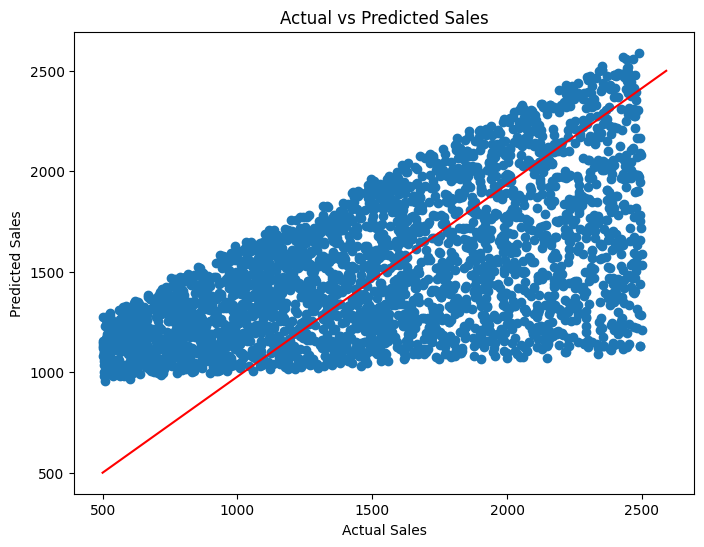

In [134]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yhat2)
plt.plot([min(y_test), max(yhat2)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

No significant change in value of R squared score is observed, therefore let's apply Ploynomial Regression

### Polynomial Regression

In [135]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_train,y_train)
yhat3 = pipe.predict(x_test)

mse = mean_squared_error(y_test, yhat3)
r2 = r2_score(y_test, yhat3)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 214300.7434532197
R-squared: 0.3519729184586122


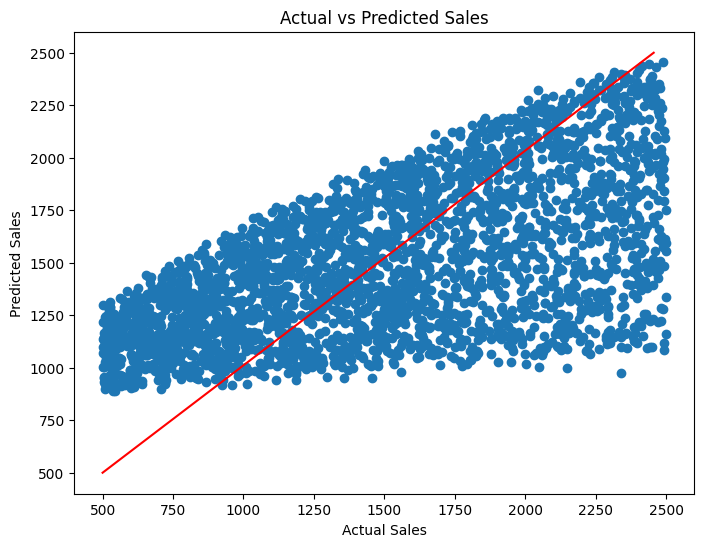

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yhat3)
plt.plot([min(y_test), max(yhat3)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

There is a general positive trend, indicating that as the actual sales increase, the predicted sales also increase. This is a sign that our model is somewhat aligned with the actual data.

Also there's a slight improvement in R squared score value, still we'll go for Ridge Regression 

### Ridge Regression

In [137]:
from sklearn.linear_model import Ridge
rm = Ridge(alpha=0.1)
rm.fit(x_train,y_train)
yhat4 = rm.predict(x_test)

mse = mean_squared_error(y_test, yhat4)
r2 = r2_score(y_test, yhat4)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 213776.29828603176
R-squared: 0.35355879569657667


Let's use grid Search to find best hyperparamter alpha for Ridge Regression

In [138]:
from sklearn.model_selection import GridSearchCV
parameter = [{'alpha': [0.001, 0.1, 10, 100, 10000, 1000000]}]
rr = Ridge()
grid = GridSearchCV(rr, parameter, cv=4)
grid.fit(x,y)
grid.best_estimator_

Ridge(alpha=1000000)

In [139]:
from sklearn.linear_model import Ridge
rm = Ridge(alpha=1000000)
rm.fit(x_train,y_train)
yhat5 = rm.predict(x_test)

mse = mean_squared_error(y_test, yhat5)
r2 = r2_score(y_test, yhat5)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 213571.71108205948
R-squared: 0.3541774498672272


As no significant increase is observed in value of R squared score, therefore let's move on to Ensemble Models:

### Random Forest Regression

In [140]:

from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
yhat6 = rf.predict(X_test)


mse = mean_squared_error(y_test, yhat6)
r2 = r2_score(y_test, yhat6)

# Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")




Mean Squared Error (MSE): 216740.05259454527
R-squared (R2 Score): 0.34284675712936497


### XGB Regressor 

In [141]:
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(n_estimators=500, random_state=42)


xgboost_model.fit(X_train, y_train)
yhat_xgb = xgboost_model.predict(X_test)
mse = mean_squared_error(y_test, yhat_xgb)
r2 = r2_score(y_test, yhat_xgb)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")


Mean Squared Error (MSE): 281320.19301049
R-squared (R2 Score): 0.14704054594039917


In [142]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
xgboost_model = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

random_search = RandomizedSearchCV(estimator=xgboost_model, 
                                   param_distributions=param_grid, 
                                   n_iter=50, 
                                   scoring='r2', 
                                   cv=5, 
                                   verbose=1, 
                                   random_state=42, 
                                   n_jobs=-1)


random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)


best_xgboost_model = random_search.best_estimator_
yhat_xgb = best_xgboost_model.predict(X_test)


mse = mean_squared_error(y_test, yhat_xgb)
r2 = r2_score(y_test, yhat_xgb)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Mean Squared Error (MSE): 209633.8327827314
R-squared (R2 Score): 0.3643926978111267


### Decision Tree Regressor

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)

mse = mean_squared_error(y_test, yhat_dt)
r2 = r2_score(y_test, yhat_dt)


print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")


Mean Squared Error (MSE): 413072.1115557779
R-squared (R2 Score): -0.25242969353755607


In [144]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


base_model = DecisionTreeRegressor()

adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}

adaboost_model = AdaBoostRegressor(random_state=42)


grid_search = GridSearchCV(adaboost_model, adaboost_params, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)


best_adaboost_model = grid_search.best_estimator_
adaboost_score = best_adaboost_model.score(X_test, y_test)
print(f"Best AdaBoost R^2 score: {adaboost_score:.4f}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best AdaBoost R^2 score: 0.3579


## Conclusion

1. Various regression models were applied, including:

* Simple Linear Regression
* Multiple Linear Regression
* Ridge Regression
* Polynomial Regression with grid search
* Random Forest Regressor
* XGB Regressor
* Decision Tree Regressor
* Adaboost Regressor with Decision Tree Regressor

2. The highest R-squared value of 0.36 was achieved using the XGB Regressor.

3. The R-squared value suggests the model explains a significant portion of the variance in sales.

4. To further improve the model's performance, experimenting with deep learning methods could help increase the R-squared score.